# Lab 1

# Business Understanding

### Describe the purpose of the data set you selected 
- *Why was this data collected in the first place?* - The data set selected is the "UNSW_NB15" network traffic data set. The data set was created to evalutate Network Intrusion Detection Systems (NIDS). According to the creators of the data set, N. Moustafa and J. Slay from the Australian Defence Force Academy, the "quality of a NIDS data set reflects two important characteristics: comprehensive reflection of contemporary threats and an inclusive normal range of traffic [1]." Before this data set was generated, they argued that existing data sets used to train and test NIDS were not representative of current traffic flows and threats[2].
- Describe how you would define and measure the outcomes from the dataset. That is: 
    - *Why is this data important?* - The importance of this data set is that it will allow NIDS to be evaluted better, which will increase their performance, increase their protective power and reduce the chance of false positives and false negatives.
    - *How do you know if you have mined useful knowledge from the dataset?* - We will know we mined useful knowledge from the data set if we can determine, based on a collection of packets of traffic data, whether the features of those packets indicate an attack or just normal traffic.
    - *How would you measure the effectiveness of a good prediction algorithm? Be specific.* - Finding a model that predicts from the network traffic whether an attack is occuring or not, and, if there is an attack, which category of attack if occuring, will measure the effectiveness of the model. Determining if an attack is occuring is the basis of the model and with refinement, we will try to search for categorizing the attack.

![Project Diagram](setup_diagram.jpg)
The diagram of the project[3]

*Source*
1. Moustafa, Nour, and Jill Slay. "UNSW-NB15: a comprehensive data set for network intrusion detection systems (UNSW-NB15 network data set)."Military Communications and Information Systems Conference (MilCIS), 2015. IEEE, 2015.
2. Moustafa, Nour, and Jill Slay. "The evaluation of Network Anomaly Detection Systems: Statistical analysis of the UNSW-NB15 data set and the comparison with the KDD99 data set." Information Security Journal: A Global Perspective (2016): 1-14.
3. https://www.unsw.adfa.edu.au/australian-centre-for-cyber-security/cybersecurity/ADFA-NB15-Datasets/

# Data Understanding

In [1]:
# Imports
from pandas.tools.plotting import parallel_coordinates
from pandas.tools.plotting import scatter_matrix
from pandas.tools.plotting import radviz
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.lda import LDA
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
pd.set_option('display.max_columns', None)    # set the max columns to show to unlimited

%matplotlib inline

C:\Anaconda\lib\site-packages\sklearn\lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)
C:\Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# Load UNSW_NB15 into a Pandas dataframe
# df = pd.read_csv('https://github.com/danielbots/network_intrusion_detection_system/blob/master/UNSW_NB15_training_set.csv') # read in the csv file
#df = pd.read_csv('UNSW_NB15_training_set.csv')
# ref: http://stackoverflow.com/questions/18664712/split-function-add-xef-xbb-xbf-n-to-my-list (2 get rid of UTF-8 BOM)
df = pd.read_csv('UNSW_NB15_training_set.csv', encoding='utf-8-sig')  # specifing encoding to get rid of the UTF- Byte order Mark (BOM) in the id field

### Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

## UNSW_NB15_training_set
- A Network Intrusion Data Set.
    - 82332 rows x 45 columns
        - **id** *int* The id of the record
        - **dur** *float* Record's total duration
        - **proto** *Nominal* Tranaction Protocol
        - **service** *Nominal* http, ftp, ssh, dns, ..., else(-)
        - **state** *Nominal* The state and its dependent protocol e.g. ACC, CLO, FIN, INT, ..., else (-)
		- **spkts** *int* Source to destination packet count
		- **dpkts** *int* Destination to source packet count 
		- **sbytes** *int* Source to destination bytes
		- **dbytes** *int* Destination to source bytes
		- **rate** *float* We were unable to find a description of rate. It does contain outliers, but we were unable to find reason to throw it out. So we kept it at any *rate*
		- **sttl** *int* Source to destination bytes
		- **dttl** *int* Destination to source time to live
		- **sload** *float* Source bits per second
		- **dload** *float* Destination bits per second
		- **sloss** *int* Source packets retransmitted or dropped
		- **dloss** *int* Destination packets retransmitted or dropped
		- **sinpkt** *float* Source inter-packet arrival time(mSec)
		- **dinpkt** *float* Destination inetr-packet arrival time(mSec)
		- **sjit** *float* Source jitter (mSec)
		- **djit** *float* Destination jitter(mSec)
		- **swin** *int* Source TCP window advertisment
		- **stcpb** *int* Source TCP sequence number
		- **dtcpb** *int* Destination TCP sequence number
		- **dwin** *int* Destination TCP window advertisment
		- **tcprtt** *float* The sum of 'synack' and 'ackdat' of the TCP
		- **synack** *float* The time between the SYN and the SYN_ACK packets of the TCP
		- **ackdat** *float* The time between the SYN_ACK and the ACK packets of the TCP
		- **smean** *int* Mean of the flow packet size transmitted by the sre
		- **dmean** *int* Mean of the flow packet size transmitted by the dst
		- **trans_depth** *int* The depth into the connection of the http request/response transaction
		- **response_body_len** *int* The content size of the data transferred from the server's http service
		- **ct_srv_src** *int* No. of Connection that contain the same service (14) and source address in 100 connections according to the last time
		- **ct_state_ttl** *int* No. for each state (6) according to specific range if value for source/destination time to live
		- **ct_dst_ltm** *int* No of connection of the same destination address (3) in 100 connections according to the last time
		- **ct_src_dport_ltm** *int* No. of connection of the same source address and the destination port in 100 connections according to the last time
		- **ct_dst_sport_ltm** *int* No. of connnection of the same destination address(3) and the source port (2) in 100 connection according to the last time (26).
		- **ct_dst_src_ltm** *int* No connection of the same source (1) and the destination (3) address in 100 connection according to the last time (26)
		- **is_ftp_login** *byte* If the ftp session is accessed by user and password then 1 else 0
		- **ct_ftp_cmd** *int* No. of flows that has a command in ftp session
		- **ct_flw_http_mthd** *int* No. of flows that has methof such as Get and Post in http service
		- **ct_src_ltm** *int* No of connections of the same source address (1) in 100 connection according to the last time(26).
		- **ct_srv_dst** *int* No. of connectio that conbtain the same service and destination address in 100 connection according to the last time
		- **is_sm_ips_ports** *byte* If source equals to destination (3) IP addresses and port numbers (2)(4) are equal, this variable takes value 1 else 0
		- **attack_cat** *Nominal* The name of each attack category. In this data set, nine categories (e.g. Fuzzers, Analysis, Backdoors, DoS, Exploits, Generic, Reconnaissance, Shellcode and Worms)
		- **label** *byte* 0 for normal and 1 for attack records

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82332 entries, 0 to 82331
Data columns (total 45 columns):
id                   82332 non-null int64
dur                  82332 non-null float64
proto                82332 non-null object
service              82332 non-null object
state                82332 non-null object
spkts                82332 non-null int64
dpkts                82332 non-null int64
sbytes               82332 non-null int64
dbytes               82332 non-null int64
rate                 82332 non-null float64
sttl                 82332 non-null int64
dttl                 82332 non-null int64
sload                82332 non-null float64
dload                82332 non-null float64
sloss                82332 non-null int64
dloss                82332 non-null int64
sinpkt               82332 non-null float64
dinpkt               82332 non-null float64
sjit                 82332 non-null float64
djit                 82332 non-null float64
swin                 82332 non-n

In [28]:
# df.describe() calculates the count, mean, standard deviation, min, max, and quartiles 
# of the data less the nominal (object) columns. 
df.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.00000,8.233200e+04,8.233200e+04,82332.00000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7993.908165,13233.785563,82410.886739,180.967667,95.713003,6.454902e+07,630546.959000,4.753692,6.308556,755.394301,121.701284,6363.075100,535.180430,133.45908,1.084642e+09,1.073465e+09,128.28662,0.055925,0.029256,0.026669,139.528604,116.275069,0.094277,1595.371885,9.546604,1.369273,5.744923,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,171642.261880,151471.456091,148620.367041,101.513358,116.667722,1.798618e+08,2393000.555646,64.649620,55.708021,6182.615732,1292.378499,56724.016689,3635.305383,127.35700,1.390860e+09,1.381996e+09,127.49137,0.116022,0.070854,0.055094,208.472063,244.600271,0.542922,38066.972292,11.090289,1.067188,8.418112,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,114.000000,0.000000,28.606114,62.000000,0.000000,1.120247e+04,0.000000,0.000000,0.000000,0.008000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.00000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,534.000000,178.000000,2650.176667,254.000000,29.000000,5.770032e+05,2112.951416,1.000000,0.000000,0.557928,0.010000,17.623919,0.000000,255.00000,2.788886e+07,2.856975e+07,255.00000,0.000551,0.000441,0.000080,65.000000,44.000000,0.000000,0.000000,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1280.000000,956.000000,111111.107200,254.000000,252.000000,6.514286e+07,15858.082275,3.000000,2.000000,63.409444,63.136369,3219.332412,128.459914,255.00000,2.171310e+09,2.144205e+09,255.00000,0.105541,0.052595,0.048816,100.000000,87.000000,0.000000,0.000000,11.000000,2.000000,6.000000,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,14355774.000000,14657531.000000,1000000.003000,255.000000,253.000000,5.268000e+09,20821108.000000,5319.000000,5507.000000,60009.992000,57739.240000,1483830.917000,463199.240100,255.00000,4.294950e+09,4.294881e+09,255.00000,3.821465,3.226788,2.928778,1504.000000,1500.000000,131.000000,5242880.000000,63.000000,6.000000,59.000000,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


Summary statistics above are for numeric data types with a totoal of 41 features. The count of 82332 indicate no missing data.

Binary Data types are **is_sm_ips_ports, is_ftp_login, label**:
- **is_sm_ips_ports** Min = 0, Max = 1, which is what I would expect as it is binary in nature
- **is_ftp_login** Min = 0, Max = 2, We wouldn't expect max = 2 for this feature (Marked as anomalous, see section on data quality for explanation)
- **label** Min = 0, Max = 1, which is what we would expect as it is binary in nature where 0 means it is a normal packet, while 1 means it is an attack record (or abnormal)

In [29]:
# List the unique values of each nominal column
header = df.columns.values.tolist()
for column in header:
    if column in df.select_dtypes(include=["object"]):
        print column + ":\n", df[column].unique()

proto:
[u'udp' u'arp' u'tcp' u'igmp' u'ospf' u'sctp' u'gre' u'ggp' u'ip' u'ipnip'
 u'st2' u'argus' u'chaos' u'egp' u'emcon' u'nvp' u'pup' u'xnet' u'mux'
 u'dcn' u'hmp' u'prm' u'trunk-1' u'trunk-2' u'xns-idp' u'leaf-1' u'leaf-2'
 u'irtp' u'rdp' u'netblt' u'mfe-nsp' u'merit-inp' u'3pc' u'idpr' u'ddp'
 u'idpr-cmtp' u'tp++' u'ipv6' u'sdrp' u'ipv6-frag' u'ipv6-route' u'idrp'
 u'mhrp' u'i-nlsp' u'rvd' u'mobile' u'narp' u'skip' u'tlsp' u'ipv6-no'
 u'any' u'ipv6-opts' u'cftp' u'sat-expak' u'ippc' u'kryptolan' u'sat-mon'
 u'cpnx' u'wsn' u'pvp' u'br-sat-mon' u'sun-nd' u'wb-mon' u'vmtp' u'ttp'
 u'vines' u'nsfnet-igp' u'dgp' u'eigrp' u'tcf' u'sprite-rpc' u'larp' u'mtp'
 u'ax.25' u'ipip' u'aes-sp3-d' u'micp' u'encap' u'pri-enc' u'gmtp' u'ifmp'
 u'pnni' u'qnx' u'scps' u'cbt' u'bbn-rcc' u'igp' u'bna' u'swipe' u'visa'
 u'ipcv' u'cphb' u'iso-tp4' u'wb-expak' u'sep' u'secure-vmtp' u'xtp' u'il'
 u'rsvp' u'unas' u'fc' u'iso-ip' u'etherip' u'pim' u'aris' u'a/n' u'ipcomp'
 u'snp' u'compaq-peer' u'ipx-n-ip' 

In [30]:
# Summary statistics on the categrical features in our dataset.
df.describe(include=['O'])

,proto,service,state,attack_cat
count,82332,82332,82332,82332
unique,131,13,7,10
top,tcp,-,FIN,Normal
freq,43095,47153,39339,37000


### Verify data quality: Explain any missing values, duplicate data, and outliers.
    - Are those mistakes? How do you deal with these problems? Be specific.

In [31]:
""" There are four records that we found that do not fit with the given feature definitions. 
    The feature "is_ftp_login" is a "byte" field. Investigating the data, we found that these 
    four records are identical to each other. The feature definition states that if the ftp 
    session is accessed by user and password then the record will have a one, otherwise a zero. 
    We are unable to determine whether these records used and ftp username and password, and 
    since they are only four out of 82k records (4 / 82332 = 4.85 * 10^(-5)) we thought that 
    eliminating them from the data set was the best choice with minimal impact.
"""
df[df.is_ftp_login == 2]

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
9434,9435,0.448151,tcp,ftp,FIN,10,10,602,690,42.396425,62,252,9675.310547,11085.54981,1,3,49.794555,30.815,70.163992,1692.426333,255,158848246,992060022,255,0,0,0,60,69,0,0,2,1,4,2,2,4,2,2,0,4,2,0,Exploits,1
11136,11137,0.448151,tcp,ftp,FIN,10,10,602,690,42.396425,62,252,9675.310547,11085.54981,1,3,49.794555,30.815,70.163992,1692.426333,255,158848246,992060022,255,0,0,0,60,69,0,0,2,1,4,2,2,4,2,2,0,4,2,0,Exploits,1
11139,11140,0.448151,tcp,ftp,FIN,10,10,602,690,42.396425,62,252,9675.310547,11085.54981,1,3,49.794555,30.815,70.163992,1692.426333,255,158848246,992060022,255,0,0,0,60,69,0,0,2,1,4,2,2,4,2,2,0,4,2,0,Exploits,1
11811,11812,0.448151,tcp,ftp,FIN,10,10,602,690,42.396425,62,252,9675.310547,11085.54981,1,3,49.794555,30.815,70.163992,1692.426333,255,158848246,992060022,255,0,0,0,60,69,0,0,2,1,4,2,2,4,2,2,0,4,2,0,Exploits,1


In [32]:
# Overwrite the existing dataframe with the new dataframe that does not contain the 
# four unwanted records and confirm we have 4 less records
df = df[df.is_ftp_login != 2]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82328 entries, 0 to 82331
Data columns (total 45 columns):
id                   82328 non-null int64
dur                  82328 non-null float64
proto                82328 non-null object
service              82328 non-null object
state                82328 non-null object
spkts                82328 non-null int64
dpkts                82328 non-null int64
sbytes               82328 non-null int64
dbytes               82328 non-null int64
rate                 82328 non-null float64
sttl                 82328 non-null int64
dttl                 82328 non-null int64
sload                82328 non-null float64
dload                82328 non-null float64
sloss                82328 non-null int64
dloss                82328 non-null int64
sinpkt               82328 non-null float64
dinpkt               82328 non-null float64
sjit                 82328 non-null float64
djit                 82328 non-null float64
swin                 82328 non-n

### Outliers

In [33]:
# using += 1.5 IQR to determine outliers from continous/oridnal numbers. 
df_desc_table = df.describe() # result: 41 numeric types
col_rate = df_desc_table['rate']
df_sub2 =df[['rate']]

q1 = df_desc_table.iloc[4]['rate']  # 4 = 25% row of description table or Q1
q3 = df_desc_table.iloc[6]['rate']  # 6 = 75% row of description table or Q3
iqr = q3 - q1
upper_outlier_threshold = q3 + (1.5 * iqr) 
lower_outlier_threshold = q1 - (1.5 * iqr)

col_index = df.columns
col_index.get_values() # Returns an array of column names 
col = df['rate']
lower_outliers = col[col < lower_outlier_threshold]
upper_outliers = col[col > upper_outlier_threshold]

print "Number of observations", len(col)
print "Number of lower outliers", len(lower_outliers)
print "Number of upper outliers", len(upper_outliers)

Number of observations 82328
Number of lower outliers 0
Number of upper outliers 6201


In [34]:
# Code that calculates the number of outliers below and above for continous numeric features.
# this is to help determine which particular feature to do box plots on.
#ref: http://stackoverflow.com/questions/24901766/python-how-to-get-column-names-from-pandas-dataframe-but-only-for-continuous
df_cont = df.select_dtypes(['float64', 'int64']) # a data frame of just continous variables
### len(df_cont.columns)
#df_cont.drop('id', axis=1, inplace=True) # 1 is the axis number ( 0 for rows 1 for columns), dropping id as it doesn't make sense to plot outliers for that column
### len(df_cont.columns)
print "Column name: #obserations: #lower_outliers: #upper_outliers: Max Values"
num_features_with_outliers = 0
for col_name in df_cont.columns:
    q1 = df_desc_table.iloc[4][col_name]  # 4 = 25% row of description table or Q1
    q3 = df_desc_table.iloc[6][col_name]  # 6 = 75% row of description table or Q3
    max_val = df_desc_table.iloc[7][col_name] # 7 = max value
    iqr = q3 - q1
    upper_outlier_threshold = q3 + (1.5 * iqr) 
    lower_outlier_threshold = q1 - (1.5 * iqr)
    col = df[col_name]
    lower_outliers = col[col < lower_outlier_threshold]
    upper_outliers = col[col > upper_outlier_threshold]
    if (len(lower_outliers) + len(upper_outliers)) > 0:
        num_features_with_outliers+=1
        print col_name + ": " + str(len(col)) + " : " + str(len(lower_outliers)) + " : " + str(len(upper_outliers)) + " : " + str(max_val)
print "Number of features with outliers: " + str(num_features_with_outliers)

Column name: #obserations: #lower_outliers: #upper_outliers: Max Values
dur: 82328 : 0 : 5868 : 59.999989
spkts: 82328 : 0 : 10196 : 10646.0
dpkts: 82328 : 0 : 8907 : 11018.0
sbytes: 82328 : 0 : 9270 : 14355774.0
dbytes: 82328 : 0 : 12308 : 14657531.0
rate: 82328 : 0 : 6201 : 1000000.003
sload: 82328 : 0 : 6715 : 5268000256.0
dload: 82328 : 0 : 18112 : 20821108.0
sloss: 82328 : 0 : 5499 : 5319.0
dloss: 82328 : 0 : 11272 : 5507.0
sinpkt: 82328 : 0 : 5667 : 60009.992
dinpkt: 82328 : 0 : 4717 : 57739.24
sjit: 82328 : 0 : 6320 : 1483830.917
djit: 82328 : 0 : 8569 : 463199.2401
tcprtt: 82328 : 0 : 2019 : 3.821465
synack: 82328 : 0 : 2954 : 3.226788
ackdat: 82328 : 0 : 2480 : 2.928778
smean: 82328 : 0 : 11928 : 1504.0
dmean: 82328 : 0 : 9902 : 1500.0
trans_depth: 82328 : 0 : 7582 : 131.0
response_body_len: 82328 : 0 : 5657 : 5242880.0
ct_srv_src: 82328 : 0 : 10093 : 63.0
ct_state_ttl: 82328 : 0 : 1833 : 6.0
ct_dst_ltm: 82328 : 0 : 10479 : 59.0
ct_src_dport_ltm: 82328 : 0 : 11476 : 59.0
ct_ds

Based on the code above there are 33 features with outliers based on 1.5 IQR standard. Note: Results were pulled out into excel to sort on number of outliers and max value to try and triage which variables to look at. Interesting to note: there were no lower outliers, just upper outliers. The top 5 features based on large number of outliers are [feature name (number of outliers)]: dload (18112) ct_dst_src_ltm (12789) dbytes(12308) smean(11928) ct_src_dport_ltm(11476)

Sorting by max_value will help to do box plots for variables with similar magnitude: E.g. 'dpkts', 'spkts' are similir in max value 'dloss', 'sloss' are similar in max value 'ct_dst_src_ltm', 'ct_srv_src', 'ct_src_ltm' are similar in max vax value

Looking at the histogram and boxplot for dpkts and spkts (below), there seems to be a lot of values very close to 0 and they seem to track each other in quantity. I wouldn't be surprised if they were highly correlated. They have very similar steep central distribution centered around 0. With the network setup I wouldn't expect packets to have more than 6 hops based on the network setup. Based on the summary statistics, 75% the dpkts and spkts have greater than 12, 10 respectively with max values of 10646.000000 11018.000000, respectively. It would be interesting to see if there may be any correlation with these values greater than 75% of the norm correlate to abnormal traffic. *See Explore relationships for further analysis with these particular features*. (Pearson Correlation heat map shows value of .37 , which indicates some postive correlation of small to medium strength). From an outlier perspective, however, it is not clear whether these packets are expected anomolies, or errors in recording. Will leave them in the dataset for now.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DACD160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001D383908>]], dtype=object)

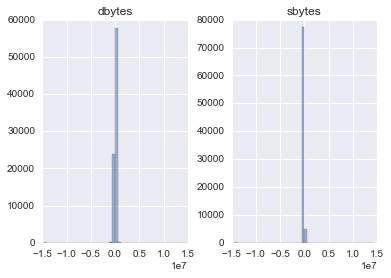

In [35]:
df[['dbytes', 'sbytes']].diff().hist(alpha=0.5, bins=50)

C:\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


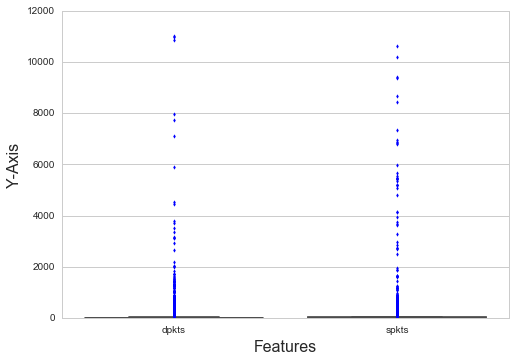

In [36]:
#Set up the graph parameters
sns.set(context='notebook', style='whitegrid')
sns.axlabel(xlabel="Features", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=df[['dpkts', 'spkts']] , fliersize=3)

In [37]:
""" Compare the percentage of source to destination packets for Attack and for
    Normal traffic. We can see that Normal traffic accounts for 65% of
    the source to destination packets that are sent, while Attack only produce
    source to destination packets roughly 35% of the time. 
"""
denom = df[(df['spkts'] > 10)]
numerator = df[(df['spkts'] > 10) & (df['label'] == 1)]
print "Percent of packets that have spkts > 12 and are labelled as an 'Attack' = " + str((float(len(numerator))/len(denom)) * 100)
numerator  = df[(df['spkts'] > 10) & (df['label'] == 0)]
print "Percent of packets that have spkts > 12 and 'Normal' = " + str((float(len(numerator))/len(denom)) * 100)

Percent of packets that have spkts > 12 and are labelled as an 'Attack' = 34.5773825564
Percent of packets that have spkts > 12 and 'Normal' = 65.4226174436


In [38]:
""" Compare the percentage of destination to source packets for Attack and for
    Normal traffic. We can see that Normal traffic accounts for nearly 70% of
    the destination to source packets that are sent, while Attack only produce
    destination to source packets 30% of the time. 
"""
denom = df[(df['dpkts'] > 10)]
numerator = df[(df['dpkts'] > 10) & (df['label'] == 1)]
print "Percent of packets that have dpkts > 10 and are labelled as an 'Attack' = " + str((float(len(numerator))/len(denom)) * 100)
numerator  = df[(df['dpkts'] > 10) & (df['label'] == 0)]
print "Percent of packets that have dpkts > 10 and 'Normal' = " + str((float(len(numerator))/len(denom)) * 100)

Percent of packets that have dpkts > 10 and are labelled as an 'Attack' = 30.4111342185
Percent of packets that have dpkts > 10 and 'Normal' = 69.5888657815


Features dloss and sloss are the source or destination packets retransmitted or dropped. 
dloss and sloss also see to have a lot of values near zero and also seem to have roughly the same amount. We would not be surprised to see these variables correlate to each other. They have very similar steep central distribution centered around zero

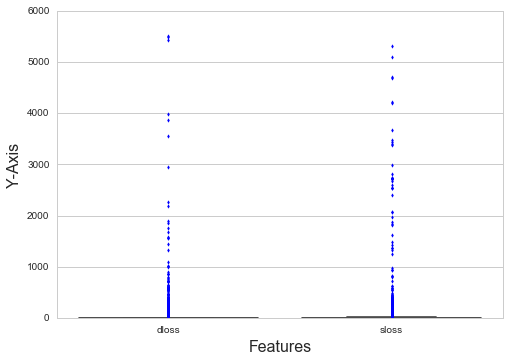

In [39]:
sns.axlabel(xlabel="Features", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=df[['dloss', 'sloss']] , fliersize=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000114697B8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001D0D6048>]], dtype=object)

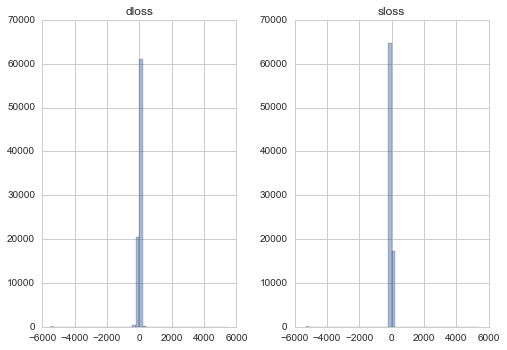

In [40]:
df[['dloss', 'sloss']].diff().hist(alpha=0.5, bins=50)

Features 'ct_dst_src_ltm', 'ct_srv_src', 'ct_src_ltm' 
The features also seem to have a lot of values near 0 although slighly wider spread then previous features. Again, would not be surprised to see these variables correlate to each other. They have very similar steep central distribution centered around 0.

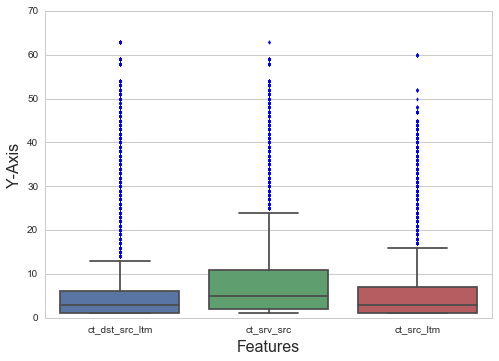

In [41]:
sns.axlabel(xlabel="Features", ylabel="Y-Axis", fontsize=16)
sns.boxplot(data=df[['ct_dst_src_ltm', 'ct_srv_src', 'ct_src_ltm']] , fliersize=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011C96BA8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D9075F8>]], dtype=object)

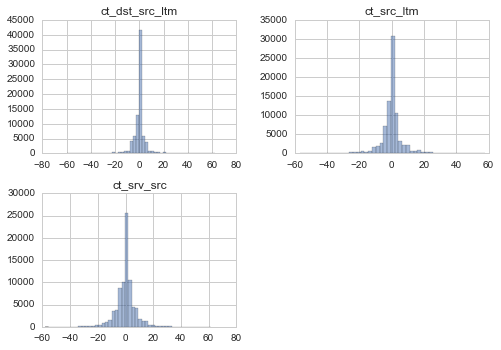

In [42]:
df[['ct_dst_src_ltm', 'ct_srv_src', 'ct_src_ltm']].diff().hist(alpha=0.5, bins=50)

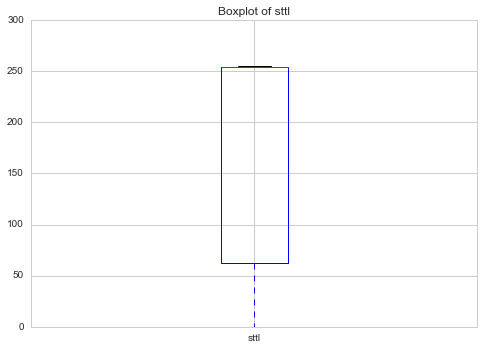

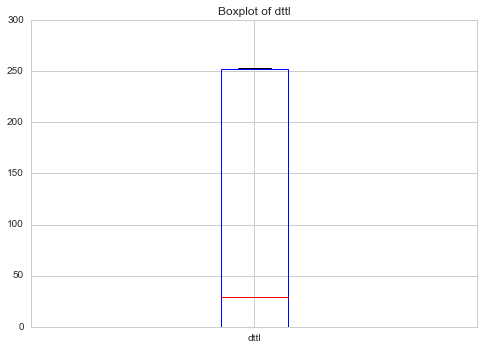

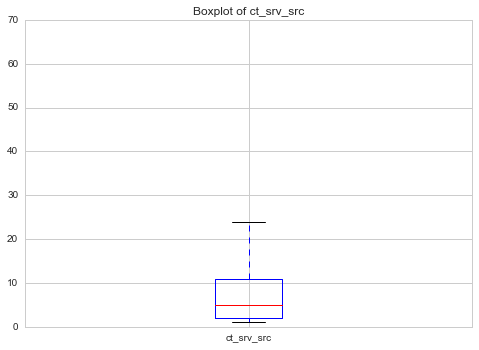

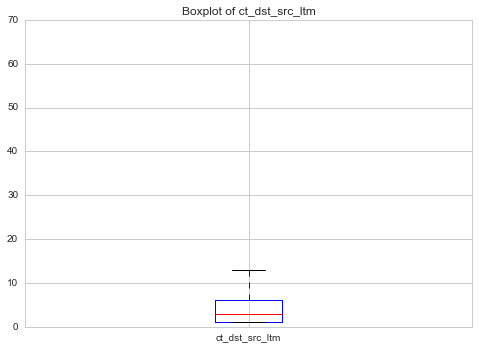

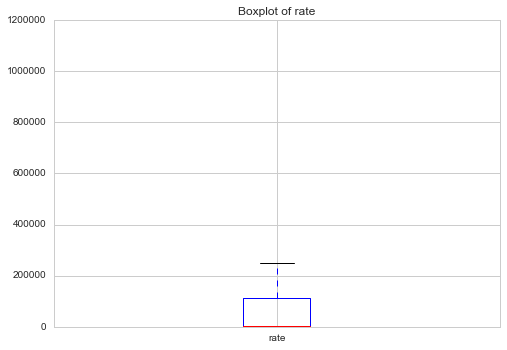

In [43]:
""" Investigating the data, we find a lot of it is confined to ranges by the nature of the data (data 
    ranging from 0 to 255, etc.) As mentioned above, we did find continuous variables that did include 
    outliers, which we did decide to keep in the data set because we did not have a reason to throw 
    them out.
"""
# Five selected columns besides those above to get a "feel" for the data
columns = ["sttl", "dttl", "ct_srv_src", "ct_dst_src_ltm", "rate"]
for column in columns:
    plt.boxplot(x=[df[column]], labels=[column])
    plt.title("Boxplot of " + column)
    plt.show()

###  Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. 
    - Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful. 

The data can have two response variables. Those features are *label* and *attack_cat*. When *label* is equal to one, then there *attack_cat* is one of nine possible attacks. When *label* is equal to zero, *attack_cat* is equal to 'Normal'. The nine possible attacks are:

In [44]:
df["attack_cat"].value_counts()

Normal            37000
Generic           18871
Exploits          11128
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [45]:
df["label"].value_counts()

1    45328
0    37000
Name: label, dtype: int64

In [46]:
df.groupby(["label"]).describe()

ackdat    ct_dst_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
label                                                                       
0     count  37000.000000  37000.000000      37000.000000    37000.000000   
      mean       0.034019      3.340973          1.085432        3.918649   
      std        0.072239      3.604964          0.331380        5.710431   
      min        0.000000      1.000000          1.000000        1.000000   
      25%        0.000000      1.000000          1.000000        1.000000   
      50%        0.000146      2.000000          1.000000        2.000000   
      75%        0.061317      4.000000          1.000000        4.000000   
      max        2.928778     48.000000          4.000000       48.000000   
1     count  45328.000000  45328.000000      45328.000000    45328.000000   
      mean       0.020672      7.707355          5.767164       10.344401   
      std        0.034256     10.466142          7.322400       13.838721   
      min        0.000000      1.000000          1.000000        1.000000   
      25%        0.000000      1.000000          1.000000        1.000000   
      50%        0.000000      3.000000          2.000000        4.000000   
      75%        0.044840      8.000000          6.000000       12.000000   
      max        0.435431     59.000000         38.000000       63.000000   

             ct_flw_http_mthd    ct_ftp_cmd  ct_src_dport_ltm    ct_src_ltm  \
label                                                                         
0     count      37000.000000  37000.000000      37000.000000  37000.000000   
      mean           0.182784      0.010135          1.757541      3.853541   
      std            0.827688      0.101769          1.804013      4.019296   
      min            0.000000      0.000000          1.000000      1.000000   
      25%            0.000000      0.000000          1.000000      1.000000   
      50%            0.000000      0.000000          1.000000      2.000000   
      75%            0.000000      0.000000          2.000000      5.000000   
      max           16.000000      2.000000         18.000000     41.000000   
1     count      45328.000000  45328.000000      45328.000000  45328.000000   
      mean           0.086459      0.006773          7.517848      8.602983   
      std            0.421376      0.082019         10.501187     10.453143   
      min            0.000000      0.000000          1.000000      1.000000   
      25%            0.000000      0.000000          1.000000      2.000000   
      50%            0.000000      0.000000          2.000000      4.000000   
      75%            0.000000      0.000000          7.000000     11.000000   
      max           16.000000      1.000000         59.000000     60.000000   

               ct_srv_dst    ct_srv_src  ct_state_ttl           dbytes  \
label                                                                    
0     count  37000.000000  37000.000000  37000.000000     37000.000000   
      mean       5.558270      5.984297      0.993027     18704.930216   
      std        5.737014      5.951828      1.383006    109038.456673   
      min        1.000000      1.000000      0.000000         0.000000   
      25%        2.000000      2.000000      0.000000       164.000000   
      50%        4.000000      4.000000      1.000000       354.000000   
      75%        7.000000      7.000000      1.000000      1890.000000   
      max       48.000000     49.000000      6.000000   1925422.000000   
1     count  45328.000000  45328.000000  45328.000000     45328.000000   
      mean      12.108366     12.455083      1.676425      8768.947560   
      std       13.360665     13.253893      0.545402    178675.566277   
      min        1.000000      1.000000      0.000000         0.000000   
      25%        1.000000      2.000000      1.000000         0.000000   
      50%        7.000000      7.000000      2.000000         0.000000   
      75%       17.000000

Above you can see the different values and their counts for the *label* and *attack_cat* features in our data set, as well as the summary statistics broken down by whether they were an 'Attack' or not.

The other attributes that we found to be significant, using the heatmaps below as compared to *label*, are:

**positive** correlation:
- sttl : 0.5
- ct_dst_sport_ltm : 0.39
- ct_src_dport_ltm : 0.34

**negative** correlation:
- swin : 0.41
- dwin : 0.37

For *sttl*, the source to destination bytes *hop limit*[4], we see that a large portion of the 'Attacks' use a *time to live* of 254 bytes. When there is not an attack, the majority of the values are 31, followed closely by 254. 

In [47]:
df.groupby(["label"]).sttl.value_counts()

label  sttl
0      31      16702
       254     15049
       62       4129
       0         987
       29         50
       1          38
       60         24
       32         19
       30          2
1      254     39000
       62       6241
       0          61
       255        25
       63          1
dtype: int64

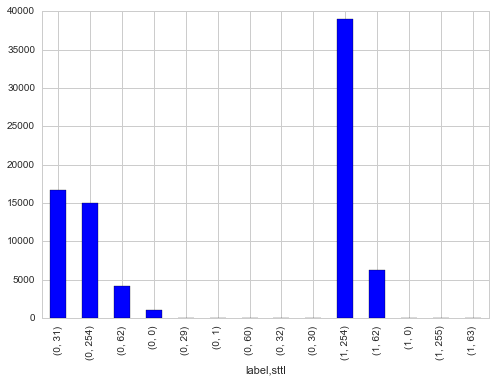

In [48]:
df.groupby(["label"]).sttl.value_counts().plot.bar()

**ct_dst_sport_ltm** and **ct_src_dport_ltm** No. of connnection of the same destination/source address(3) and the source/destination port (2) in 100 connection according to the last time (26).
- This feature is unusual in that it uses features that this data set does not have. Features in the original data set have the source and destination IP and the start timestamp and last timestamp. 
- This feature is correlated with the *label* feature, so it is of interest in that respect too.

In [49]:
df.groupby(["label"]).ct_dst_sport_ltm.value_counts()

label  ct_dst_sport_ltm
0      1                   34334
       2                    2262
       3                     313
       4                      91
1      1                   19549
       4                    5036
       2                    4258
       3                    4186
       25                   2251
       18                   2127
       6                    1063
       14                    618
       16                    565
       10                    453
       13                    440
       8                     437
       15                    436
       17                    402
       11                    400
       9                     374
       12                    330
       20                    330
       5                     329
       22                    311
       19                    307
       23                    288
       24                    287
       21                    255
       7                     238
       27          

In [50]:
df.groupby(["label"]).ct_src_dport_ltm.value_counts()

label  ct_src_dport_ltm
0      1                   25879
       2                    6164
       3                    1690
       6                    1117
       5                     648
       4                     524
       7                     272
       9                     140
       8                     119
       10                     88
       13                     79
       12                     73
       11                     71
       14                     69
       15                     28
       16                     27
       18                     12
1      1                   17302
       2                    5493
       4                    4121
       3                    3483
       7                    2017
       25                   1661
       18                   1598
       6                    1178
       43                    909
       14                    541
       5                     506
       16                    442
       10          

It does appear that when an Attack is occuring there can be many more connections made than when it is just Normal traffic. In the *ct_dst_sport_ltm* feature, 'Normal' traffic does not get more than four connections, but when there is an 'Attack' up to 38 connections can be made to a given destination port. 

When Attack is True, the swin value is either 0 or 255, where as 'Normal' traffic has a range between 0 and 255 inclusive. There are:
- 30k attack records when swin/dwin is 0
- 15k attack records when swin/dwin is 255

In [51]:
df.groupby(["label"]).swin.value_counts()

label  swin
0      255     27839
       0        9152
       5           1
       43          1
       52          1
       67          1
       99          1
       154         1
       156         1
       202         1
       245         1
1      0       30085
       255     15243
dtype: int64

We can see that a third of the time there is an 'Attack' the *swin* value is 255, while two-thirds of the time it is zero. This is in stark contrast with what we see when there is not an 'Attack.' When the *label* is zero (meaning 'Normal' network traffic), the majority (approximately 75%) of the values are 255, while only a quarter of the traffic is zero. This could indicate that a *swin* value of zero is indicitive of an attack. 

### Visualize the most important attributes appropriately (at least 5 attributes).
    - Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate. 

As noted above, using the Heat maps found below, we were able to get the top features that were correlated with the *label* feature. Here we continue to visualize those features, beginning with boxplots of the data contrasting them by whether the data was associated with an "Attack" or not. 

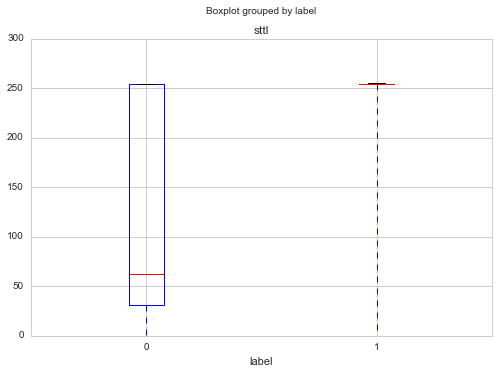

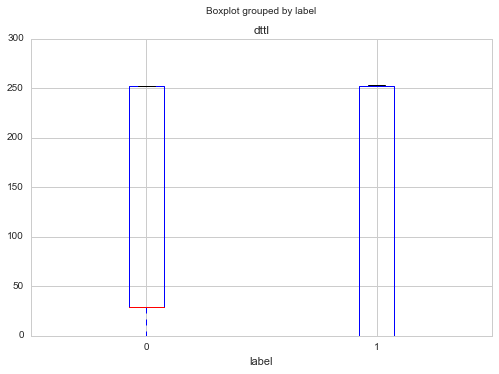

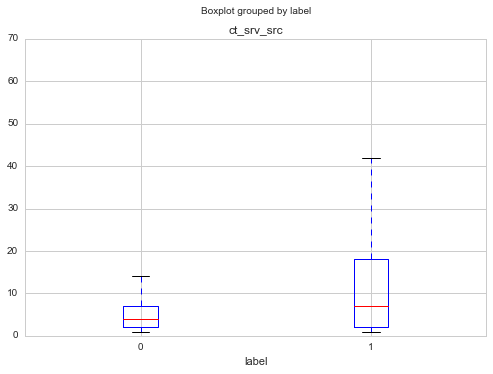

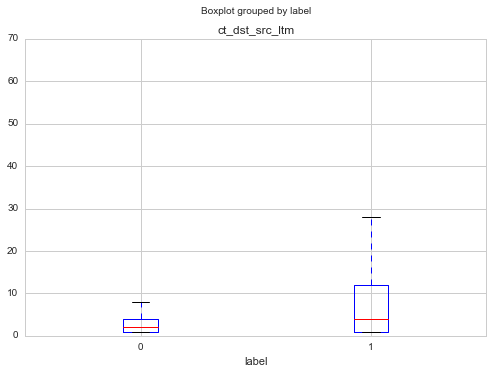

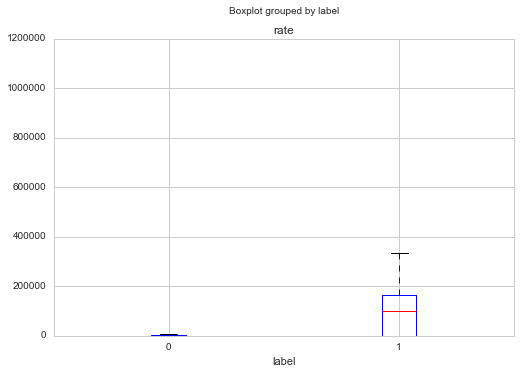

In [52]:
#sttl
df.boxplot(column="sttl", by="label")
#dttl
df.boxplot(column="dttl", by="label")
plt.show()
#ct_srv_src
df.boxplot(column="ct_srv_src", by="label")
plt.show()
#ct_dst_src_ltm
df.boxplot(column="ct_dst_src_ltm", by="label")
#rate
df.boxplot(column="rate", by="label")
plt.show()

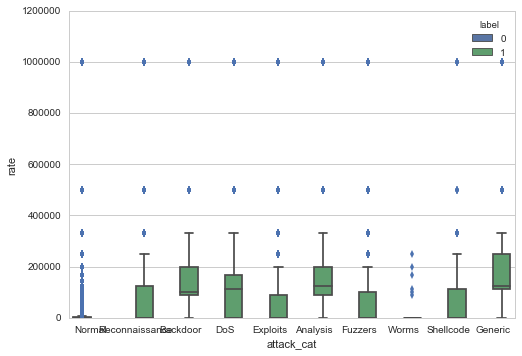

In [53]:
""" A breakdown of the attacks used in this data set by the rate at which
    we think they occurred. 
"""
sns.set(style="whitegrid", color_codes=True)
ax = sns.boxplot(x="attack_cat",y="rate", hue= "label",data=df)

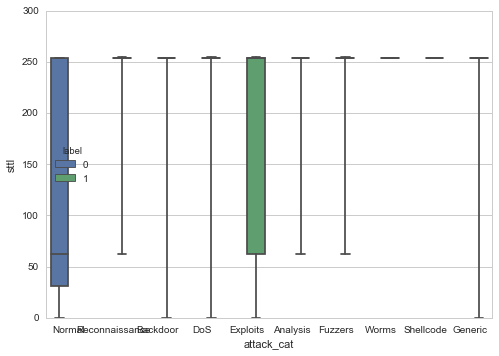

In [54]:
""" Using the feature *sttl* we see that most of the values are 255
    except when the value is Normal or an Exploit attack. We also 
    see that 0 (Normal traffic) has a median closer to 56, meaning 
    that a sttl near 255 could indicate that an attack is occuring
"""
sns.set(style="whitegrid", color_codes=True)
ax = sns.boxplot(x="attack_cat",y="sttl", hue= "label",data=df)

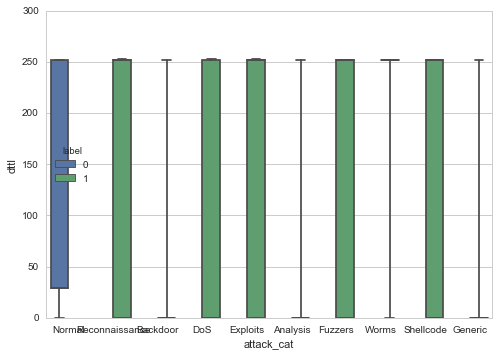

In [55]:
""" If we look at the "dttl" feature, we see a slightly different picture.
    It isn't surprising to see DoS attacks with values of 255, but five out
    of the nine attacks have values between zero and 255. The unusual attacks
    are Backdoor, Analysis, and Generic, which are a majority of zeroes, with
    outliers in the 255 range.
"""
sns.set(style="whitegrid", color_codes=True)
ax = sns.boxplot(x="attack_cat",y="dttl", hue= "label",data=df)

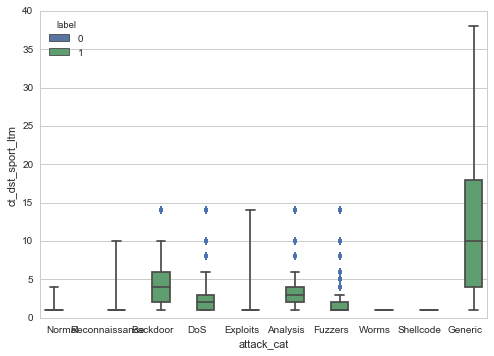

In [56]:
""" We can see from this graph, that the graph reflects what we numerically saw in the 
    previous section. The Normal traffic is much closer to zero connections, where
    the Attack traffic is much more varied in the number of connections that it makes.
"""
sns.set(style="whitegrid", color_codes=True)
ax = sns.boxplot(x="attack_cat",y="ct_dst_sport_ltm", hue= "label",data=df)

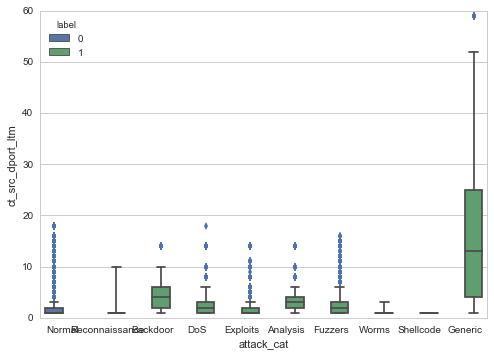

In [57]:
""" As we perceived earlier, there seems less of a corroboration between this feature
    as far as the "attack_cat" goes, except in the "Generic" attack category. 
"""
sns.set(style="whitegrid", color_codes=True)
ax = sns.boxplot(x="attack_cat",y="ct_src_dport_ltm", hue= "label",data=df)

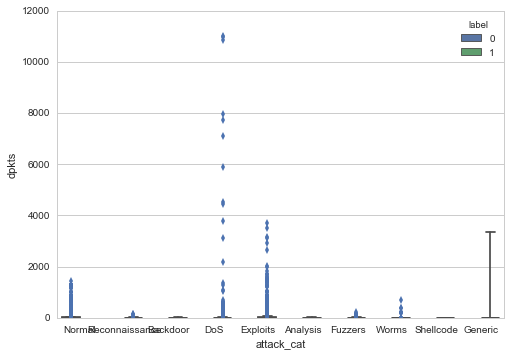

In [58]:
""" Looking at the dpkts feature from the outlier section, we see that most of the
    outliers come from the DoS attack, which makes sense that the DoS attack would
    get overwhelmed by trying to return requests, thus cause the DoS.
"""
sns.set(style="whitegrid", color_codes=True)
ax = sns.boxplot(x="attack_cat",y="dpkts", hue= "label",data=df)

### Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. 
    - Explain any interesting relationships.

**Feature: dpkts**
It is interesting to note that for the expected_dpkts_size (which is defined as anything less than the 75% quartile (< 10) there are more attack packets than normal ones. Conversely, for unexpected dpkts size (>=10) the reverse is true.

label_cat              attack  normal
dpkts_cat                            
expected_dpkts_size     39625   23950
unexpected_dpkts_size    5703   13050


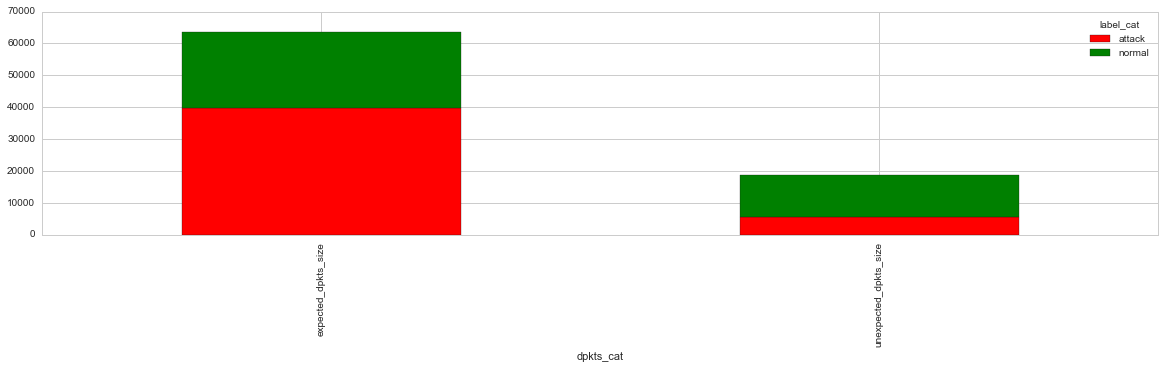

In [59]:
# Defensive copy of original dataframe.
df2 = df.copy(deep=True)
bins =[-1, 10, 11019] # Note: values needed to be slighlty greater than the min and max values to ensure the get counted.
bins2 = [-1, .5, 2]  # created bins 2 to rename 0, 1 ( false, true) to normal, abnormal to intepret plot easier.
group_names = ['expected_dpkts_size', 'unexpected_dpkts_size']
group_names2 = ['normal', 'attack']
categories = pd.cut(df2['dpkts'], bins, labels=group_names)
categories2 = pd.cut(df2['label'], bins2, labels=group_names2)
df2['dpkts_cat'] =  pd.cut(df2['dpkts'], bins, labels=group_names)
df2['label_cat'] =  pd.cut(df2['label'], bins2, labels=group_names2)
#abnormal_counts = pd.crosstab([df2['dpkts_cat']], df2.label.astype(bool))
abnormal_counts = pd.crosstab([df2['dpkts_cat']], df2.label_cat.astype(str))
print abnormal_counts
#abnormal_counts.plot(kind='bar', stacked=True, color=['green','red'], figsize=(20,4))
abnormal_counts.plot(kind='bar', stacked=True, color=['red','green'], figsize=(20,4)) # swap color when switch out label to abnormal/normal

**Heat Maps** for every feature compared to *label*
- As noted above, we chose the 5 features with the most correlation, positive or negative.

In [60]:
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings

#attack records
df1_1 = df[['label', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss']]
df1_1 = df1_1[df1_1.label == 1]

df1_2 = df[['label', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb']]
df1_2 = df1_2[df1_2.label == 1]

df1_3 = df[['label', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'tcprtt']]
df1_3 = df1_3[df1_3.label == 1]

## normal records
df0_1 = df[['label', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss']]
df0_1 = df0_1[df0_1.label == 0]

df0_2 = df[['label', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb']]
df0_2 = df0_2[df0_2.label == 0]

df0_3 = df[['label', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'tcprtt']]
df0_3 = df0_3[df0_3.label == 0]


## both attack and normal records
df_1 = df[['label', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss']]
df_2 = df[['label', 'service', 'sload', 'dload', 'spkts', 'dpkts', 'swin', 'dwin', 'ct_src_dport_ltm', 'ct_dst_sport_ltm']]
df_3 = df[['label', 'stcpb', 'dtcpb', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'sjit', 'djit', 'tcprtt']]
df_4 = df[['label', 'sinpkt', 'dinpkt', 'synack', 'ackdat', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm','ct_src_dport_ltm', 'ct_dst_sport_ltm']]
df_5 = df[['label', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']]

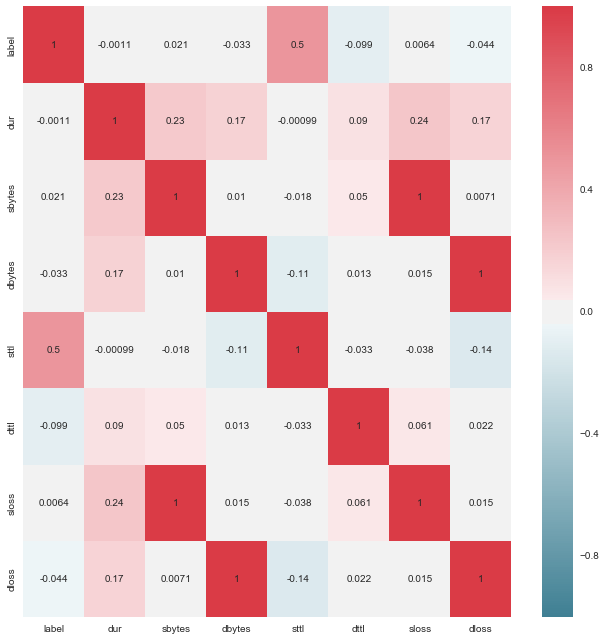

In [61]:
# NORMAL and ATTACK records

# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_1.corr(), cmap=cmap, annot=True)

f.tight_layout()

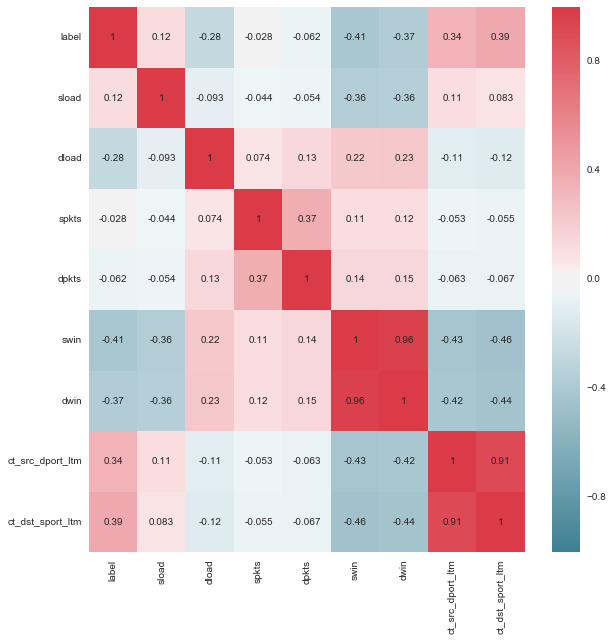

In [62]:
# NORMAL and ATTACK records

# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_2.corr(), cmap=cmap, annot=True)

f.tight_layout()

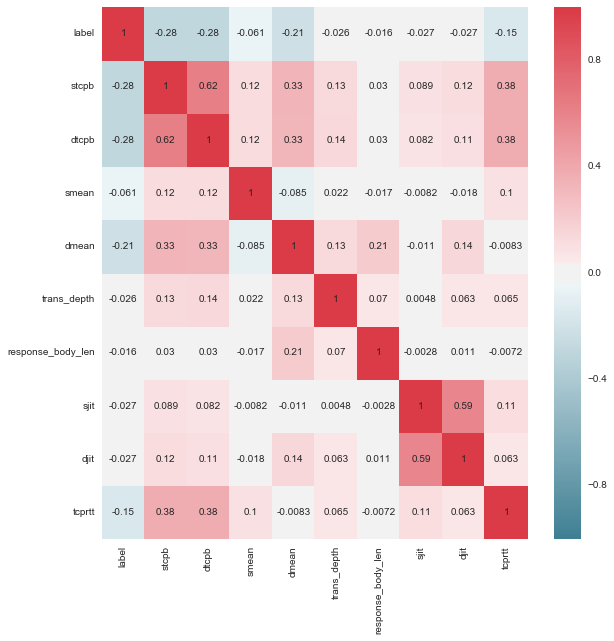

In [63]:
# NORMAL and ATTACK records

# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_3.corr(), cmap=cmap, annot=True)

f.tight_layout()

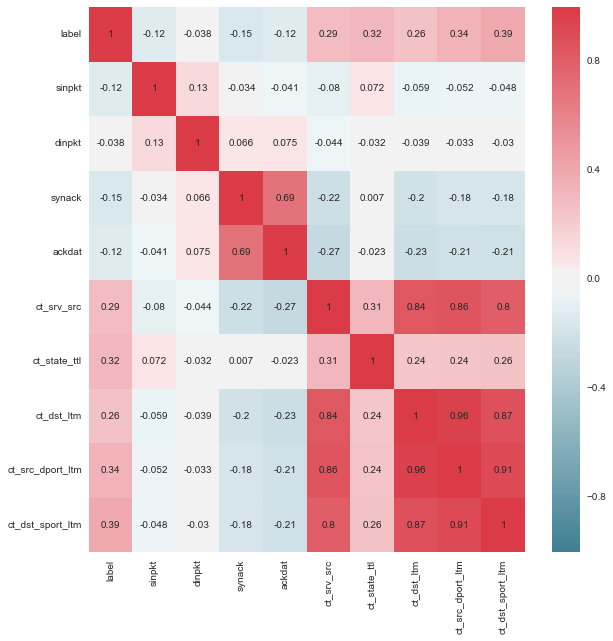

In [64]:
# NORMAL and ATTACK records

# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_4.corr(), cmap=cmap, annot=True)

f.tight_layout()

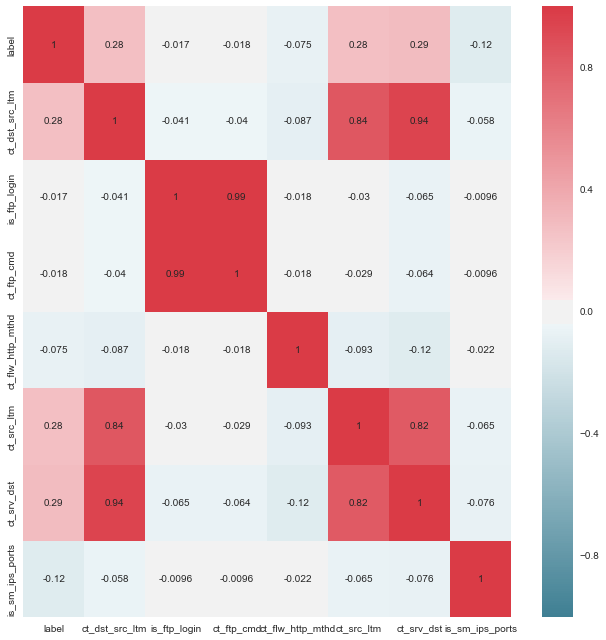

In [65]:
# NORMAL and ATTACK records

# plot the correlation matrix using seaborn
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))

sns.heatmap(df_5.corr(), cmap=cmap, annot=True)

f.tight_layout()

**Scatter Plots** for interesting features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000174B1CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000003528D470>]], dtype=object)

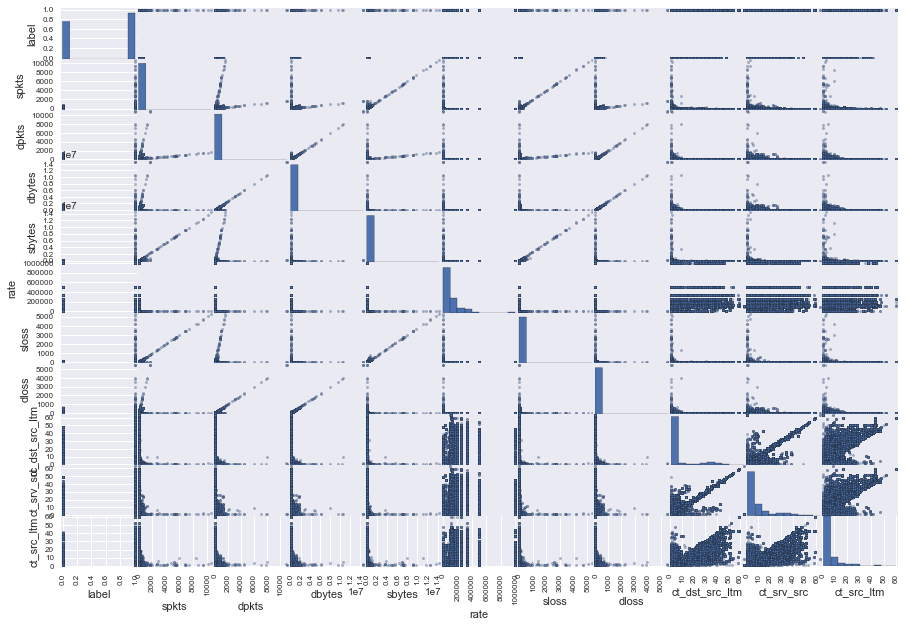

In [66]:
df_sub = df[['label', 'spkts', 'dpkts', 'dbytes', 'sbytes', 'rate', 'sloss', 'dloss', 'state', 'ct_dst_src_ltm', 'ct_srv_src', 'ct_src_ltm' ]]
df_corr = df_sub.corr(method='pearson')

header = df_sub.columns.values.tolist()
#print header
#len(header)
scatter_matrix(df_sub,figsize=(15, 10))

Looking at the scatter plot matrix, there appears to be varying degrees of positive linear correlation between the following features: dbytes - dloss; dpkts - dloss; sbytes sloss; spkts - sloss; ct_srv_src - ct_dst_src_ltm; dpkts - dbytes Other features are more difficult to find signifiant linear correlation due to binary nature of variable. The heat map below will help identify them visually based on color gradient which relates to strength.

In [67]:
df_corr

,label,spkts,dpkts,dbytes,sbytes,rate,sloss,dloss,ct_dst_src_ltm,ct_srv_src,ct_src_ltm
label,1.000000,-0.027728,-0.061513,-0.032629,0.020643,0.328662,0.006362,-0.044398,0.280008,0.290234,0.276512
spkts,-0.027728,1.000000,0.369554,0.198324,0.965750,-0.068251,0.973644,0.198683,-0.061854,-0.058719,-0.049368
dpkts,-0.061513,0.369554,1.000000,0.976419,0.175834,-0.083175,0.189060,0.981506,-0.075013,-0.062839,-0.057375
dbytes,-0.032629,0.198324,0.976419,1.000000,0.010036,-0.047981,0.014561,0.997109,-0.044049,-0.034333,-0.033303
sbytes,0.020643,0.965750,0.175834,0.010036,1.000000,-0.025103,0.995027,0.007091,-0.024066,-0.030206,-0.021540
rate,0.328662,-0.068251,-0.083175,-0.047981,-0.025103,1.000000,-0.040141,-0.062075,0.358897,0.367659,0.327558
sloss,0.006362,0.973644,0.189060,0.014561,0.995027,-0.040141,1.000000,0.014661,-0.035798,-0.040120,-0.031761
dloss,-0.044398,0.198683,0.981506,0.997109,0.007091,-0.062075,0.014661,1.000000,-0.056493,-0.045935,-0.043067
ct_dst_src_ltm,0.280008,-0.061854,-0.075013,-0.044049,-0.024066,0.358897,-0.035798,-0.056493,1.000000,0.933798,0.840012
ct_srv_src,0.290234,-0.058719,-0.062839,-0.034333,-0.030206,0.367659,-0.040120,-0.045935,0.933798,1.000000,0.822487


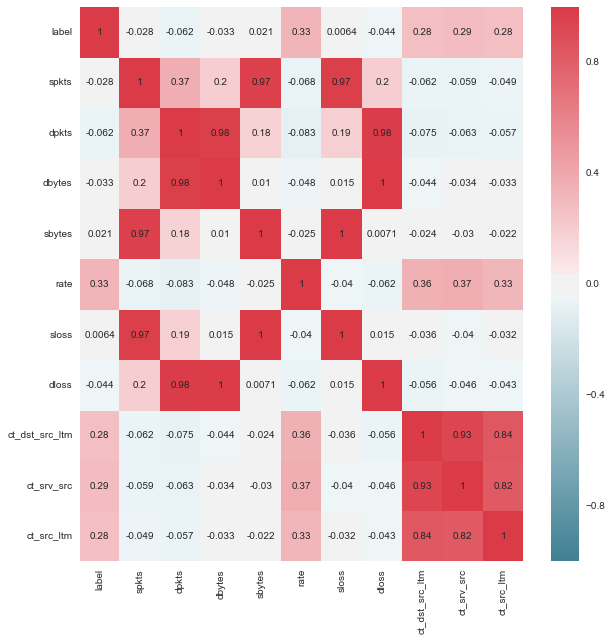

In [68]:
cmap = sns.diverging_palette(220, 10, as_cmap=True) # one of the many color mappings
sns.set(style="darkgrid") # one of the many styles to plot using

f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df_corr, cmap=cmap, annot=True)
f.tight_layout()

### Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

Note: In the analysis in the "Explore relationships between attributes" section the cross tab of dpkts and label (normal/attack) fulfills some of this requirment as we believe there may be a relationship between *dpkts* (explanatory) and *label*(response)

**Parallel coordinate plot**: Attempting to find interesting relationships, we ran a few parallel coordinate plots on the features that were highly correlated with the *label* feature. In this first plot we see the relationship between *swin*, *dwin*, and *sttl* as it pertains to Attack(1) and Normal(0) traffic. 

We note that the attacks are always within one standard deviation of the mean, while Normal traffic extends beyond that. We think that we can use this information to help determine whether traffic is Normal if it is beyond one standard deviation. 

The second parallel coordinate plot shows how the Attack traffic uses more connections than the Normal traffic. These connections and their magnitude over one standard deviation can help us design a model to predict when an Attack may be occuring or about to occur.

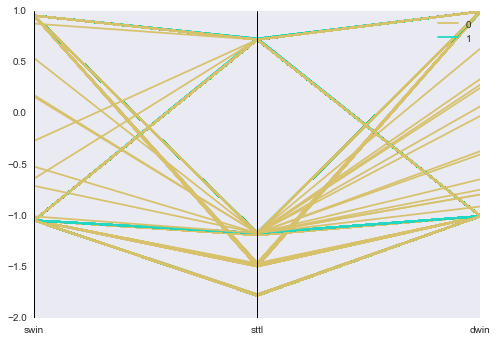

In [ ]:
df_sub = df[['label','swin','sttl','dwin']]
df_normalized = (df_sub-df_sub.mean())/(df_sub.std())
df_normalized.label = df_sub.label

parallel_coordinates(df_normalized,'label')

plt.figure()

In [ ]:
df_sub = df[['label','ct_dst_sport_ltm','swin','sttl','ct_src_dport_ltm','dwin']]

df_normalized = (df_sub-df_sub.mean())/(df_sub.std())
df_normalized.label = df_sub.label

parallel_coordinates(df_normalized,'label')

plt.figure()

In [ ]:
# RadViz is a way of visualizing multi-variate data. It is based on a simple spring tension
# minimization algorithm. Basically you set up a bunch of points in a plane. In our case they
# are equally spaced on a unit circle. Each point represents a single attribute. You then pretend
# that each sample in the data set is attached to each of these points by a spring, the stiffness of which is
# proportional to the numerical value of that attribute (they are normalized to unit interval).
# The point in the plane, where our sample settles to (where the forces acting on our sample are at an equilibrium) is where
# a dot representing our sample will be drawn. Depending on which class that sample belongs it will be colored differently.
df_sub = df[['label','swin','sttl','dwin']]
df_normalized = (df_sub-df_sub.mean())/(df_sub.std())
df_normalized.label = df_sub.label

plt.figure()
radviz(df_sub, 'label')

In [ ]:
df_sub = df[['label','ct_dst_sport_ltm','swin','sttl','ct_src_dport_ltm','dwin']]

df_normalized = (df_sub-df_sub.mean())/(df_sub.std())
df_normalized.label = df_sub.label

plt.figure()
radviz(df_sub, 'label')

 ### Are there other features that could be added to the data or created from existing features? Which ones? 

Note: In the analysis in the "Explore relationships between attributes" section the cross tab of dpkts and label (normal/attack) fulfills this requirment as we created 'dpkts_cat' and 'label_cat' from the existing variables in continous to categorial conversation to be able to do cross tab analysis.

**Rate**: The data set included the feature *rate* but we were unable to find how this feature was calculated or what it meant, we even reached out to the authors, but at the time of this writing, we had not heard back from them. Thus, we were not able to fully use this data to our advantage.

**Timestamp**: A timestamp was used in the original collection of data but was not put into the data set that we used. Having a timestamp may have allowed us to further pinpoint the duration of attacks or other significant features correlated to it. 

**Source IP Addresses**: Even though this experiment only used three servers, we may have been able to gleem some correlation between certain attacks and their IP address. We understand that with the resouces that the data set was created could cause some biasing of algorithms based on the same IPs used over and over again, but it still would have been useful information to rule out.

### Exceptional work:

We attempted to perform a PCA on our data set with every variable included, but we got a warning that the variables are collinear. Of course collinear variables make the PCA inaccurate because it does not know which feature is responsible for changing the response variable. We reduced the dimensionality to the five most correlated features to the *lable* feature. This allowed us to complete the PCA with two components. The eigenvectors can be seen below.

In [ ]:
#ref: http://localhost:8888/notebooks/DataMiningNotebooks/03.%20Dimension%20Reduction.ipynb

# Lets apply PCA against our numeric variables to see if we can find new component features that my reduce
# the dimensionality of our dataset, but still explain it well.
df_copy = df.select_dtypes(['float64', 'int64'])

y = df.attack_cat
#df_copy.drop('attack_cat', axis=1, inplace=True) 

pca = PCA(n_components=2)
X_PCA = pca.fit(df_copy).transform(df_copy)

lda = LDA(n_components=2)
X_lda = lda.fit(df_copy, y).transform(df_copy) # fit data and then transform it

#print the components
print'pca:', pca.components_
print 'lda:', lda.scalings_.T

In [ ]:
# Lets apply PCA against our numeric variables to see if we can find new component features that my reduce
# the dimensionality of our dataset, but still explain it well.
df_copy = df[["sttl", "ct_dst_sport_ltm", "ct_src_dport_ltm", "swin", "dwin"]]

y = df.attack_cat
#df_copy.drop('attack_cat', axis=1, inplace=True) 

pca = PCA(n_components=2)
X_PCA = pca.fit(df_copy).transform(df_copy)

lda = LDA(n_components=2)
X_lda = lda.fit(df_copy, y).transform(df_copy) # fit data and then transform it

#print the components
print'pca:', pca.components_
print 'lda:', lda.scalings_.T

For another attempt at the PCA we tried to do it to predict the *label* feature using all of the features again, and plot it. This did not work well because, we're assuming there was the issue with collinearity. Unfortunately, we ran out of time to try a reduced dimensionality on this form of the PCA.

In [ ]:
df_copy2 = df.select_dtypes(['float64', 'int64'])
X_reduced = PCA(n_components=2).fit_transform(df_copy2)
Y = df.label

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('First Eigenvector')
plt.ylabel('Second Eigenvector')


plt.xticks(())
plt.yticks(())
plt.show()

# Mini-Project: SVM&LR Classification

There are two natural dependent variables, label and attack_cat
Initial approach is to prep the existing variables for classification and throw in the kitchen sink and baseline our accuracy. Then look further to see what variables my be cross correlated, or less weight and remove them to see if we can increase our accuracy. May be useful/productive to tie in PCA results to help guide us here.

Note: To save time, just run the 1st cells at the top of this notebook then start from here on down. 


In [3]:
df3 = df.copy(deep=True)  # "Kitchen sink"
#df3 = df3[['label', 'attack_cat']]  # Used to test out perfect predictor of attack_cat one hot encoded
#df3 =  df3[['label', 'dttl', 'ct_dst_src_ltm']]
#df3 =  df3[['label', 'dttl']]
#df3 =  df3[['label', 'ct_dst_src_ltm']]

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82332 entries, 0 to 82331
Data columns (total 45 columns):
id                   82332 non-null int64
dur                  82332 non-null float64
proto                82332 non-null object
service              82332 non-null object
state                82332 non-null object
spkts                82332 non-null int64
dpkts                82332 non-null int64
sbytes               82332 non-null int64
dbytes               82332 non-null int64
rate                 82332 non-null float64
sttl                 82332 non-null int64
dttl                 82332 non-null int64
sload                82332 non-null float64
dload                82332 non-null float64
sloss                82332 non-null int64
dloss                82332 non-null int64
sinpkt               82332 non-null float64
dinpkt               82332 non-null float64
sjit                 82332 non-null float64
djit                 82332 non-null float64
swin                 82332 non-n

In [4]:
# Lets remove attributes that are not useful to us during this first analysis pass
non_useful_features_list = ['id', 'attack_cat']
#non_useful_features_list = ['id'] # Removed attack_cat/ LR accuracy: 0.754888861897
# id: n internal variable to just ref an obseration. deemed not usefl
# attack_cat: first try and just predict the label. 
#             It will obviously 1:1 correlate with label
#             We can circle back and swap it out with label 
#             to see if we get any better accuracy on an 
#             on an attack type level
for feature in non_useful_features_list:
    if feature in df3:
        df3.drop(feature, axis=1, inplace=True)  # Lets drop id as it is an internal variable to just ref an obseratio

# Overwrite the existing dataframe with the new dataframe that does not contain the 
# four unwanted records and confirm we have 4 less records (shold have 82328 observations)
if "is_ftp_login" in df3:
    df3 = df3[df3.is_ftp_login != 2]
    if len(df3) == 82328:
        print "duplicate record deleted successfully: " + str(len(df3)) + " observations remaining" 

# Check to see if non useful features still exist in dataframe, if so, we did something wrong
for feature in non_useful_features_list:
    if feature in df3:
        print "[" + feature + "]" + "still found, check removal code. (Should not see this)"

duplicate record deleted successfully: 82328 observations remaining


In [110]:
df3.describe()
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82328 entries, 0 to 82331
Data columns (total 43 columns):
dur                  82328 non-null float64
proto                82328 non-null object
service              82328 non-null object
state                82328 non-null object
spkts                82328 non-null int64
dpkts                82328 non-null int64
sbytes               82328 non-null int64
dbytes               82328 non-null int64
rate                 82328 non-null float64
sttl                 82328 non-null int64
dttl                 82328 non-null int64
sload                82328 non-null float64
dload                82328 non-null float64
sloss                82328 non-null int64
dloss                82328 non-null int64
sinpkt               82328 non-null float64
dinpkt               82328 non-null float64
sjit                 82328 non-null float64
djit                 82328 non-null float64
swin                 82328 non-null int64
stcpb                82328 non-n

In [5]:
# Summary statistics on the categrical features in our dataset.
try:
    df3.describe(include=['O']) # Surround in try except incase there are no object type features
except ValueError as e:
    print "Value error({0}): ".format(e)

    Based on this, lets one-hot encode the above categorical variables. Note expect number of
    features to increase based on sum of unique values. so 43 + 151 = 194

In [6]:
# http://stackoverflow.com/questions/19482970/get-list-from-pandas-dataframe-column-headers

#tmp_df = pd.get_dummies(df3.proto, prefix='proto')
#df3 = pd.concat((df3,tmp_df), axis=1)   # number of features added equates to number of unique values per categorical feature
# Surrounding code in try/except on case where there are no object type features to one-hot encode
try:
    tmp_df = df3.describe(include=['O'])  # creates a temporary df with just categorical features that are of object type
    #type(tmp_df)
    categorical_object_col_name_list = tmp_df.columns.values.tolist()
    for col_name in categorical_object_col_name_list:
        #print col_name
        tmp_df = pd.get_dummies(df3[col_name], prefix=col_name)
        df3 = pd.concat((df3,tmp_df), axis=1)
        df3.drop(col_name, axis=1, inplace=True)  # go ahead and drop original feature as it has now been one-hot encoded
except ValueError as e:
    print "Value error({0}): ".format(e)  # Note
    



In [7]:
df3.describe()
df3.info()  # visually inspected Columns, 191[removing id, attack_cat], check!
            # visually inspect columns, 201[removing id] (add extra 10 for the 10 attack types), check!
    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82328 entries, 0 to 82331
Columns: 191 entries, dur to state_RST
dtypes: float64(162), int64(29)
memory usage: 120.6 MB


At this point, all the features are now floats or integers and ready for processing


** This is s stub to possible reate some new variable based on existing variable
to see if it helps with increasing accuracy of model

In [8]:
from sklearn.cross_validation import ShuffleSplit
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

# we want to predict the X and y data as follows:
response_var = 'label'
if response_var  in df3:
    y = df3[response_var].values # get the labels we want
    del df3[response_var] # get rid of the class label
    X = df3.values # use everything else to predict!
    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits    
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         test_size  = 0.2)
print(cv_object)

The scikit-learn version is 0.18.
ShuffleSplit(82328, n_iter=3, test_size=0.2, random_state=None)


# Logistic Regression
Now let's use Logistic Regression from `scikit-learn`. The documentation can be found here:

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [115]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object: 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    lr_clf.fit(X_train,y_train)  # train object
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time

('====Iteration', 0, ' ====')
('accuracy', 0.74960524717599908)
('confusion matrix\n', array([[6354, 1045],
       [3078, 5989]]))
('====Iteration', 1, ' ====')
('accuracy', 0.75069840884246331)
('confusion matrix\n', array([[6424,  997],
       [3108, 5937]]))
('====Iteration', 2, ' ====')
('accuracy', 0.75112352726831044)
('confusion matrix\n', array([[6396,  984],
       [3114, 5972]]))


In [116]:
# this does the exact same thing as the above block of code, but with shorter syntax

for iter_num, (train_indices, test_indices) in enumerate(cv_object):
    lr_clf.fit(X[train_indices],y[train_indices])  # train object
    y_hat = lr_clf.predict(X[test_indices]) # get test set precitions

    # print the accuracy and confusion matrix 
    print("====Iteration",iter_num," ====")
    print("accuracy", mt.accuracy_score(y[test_indices],y_hat)) 
    print("confusion matrix\n",mt.confusion_matrix(y[test_indices],y_hat))

('====Iteration', 0, ' ====')
('accuracy', 0.76339123041418677)
('confusion matrix\n', array([[6465,  953],
       [2943, 6105]]))
('====Iteration', 1, ' ====')
('accuracy', 0.75786469087817321)
('confusion matrix\n', array([[6490,  929],
       [3058, 5989]]))
('====Iteration', 2, ' ====')
('accuracy', 0.75422081865662582)
('confusion matrix\n', array([[6490,  975],
       [3072, 5929]]))


In [117]:
# and here is an even shorter way of getting the accuracies for each training and test set
from sklearn.cross_validation import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
print(accuracies)
print "Average Accuracy across " + str(num_cv_iterations) + " shuffle split cross validation iterations = " + str(np.average(accuracies))

[ 0.75148791  0.7547674   0.75871493]
Average Accuracy across 3 shuffle split cross validation iterations = 0.75499008057


In [118]:
# here we can change some of the parameters interactively
from ipywidgets import widgets as wd

def lr_explor(cost):
    lr_clf = LogisticRegression(penalty='l2', C=cost, class_weight=None) # get object
    accuracies = cross_val_score(lr_clf,X,y=y,cv=cv_object) # this also can help with parallelism
    print(accuracies)

wd.interact(lr_explor,cost=(0.001,5.0,0.05))

[ 0.75470667  0.75343131  0.75245961]


<function __main__.lr_explor>

Compiled results so far:
1. Accuracy of logistic regression model with removing ['id'] = 0.754888861897
2. Accuracy of logistic regression model with removing  ['id', 'attack_cat'] =  0.753957650107
(Doesn't make sense, yet)
3. Ran logistic regression with just attack_cat and label, and got 100% accuracy which is what I expect. So it appears that if we throw in additional variables in logistic regression
with a variable that perfectly fits the response, they will reduce the accuracy.

Manipulating cost, does not appear to have an appreciable effect on accuracy.
Although, so far with the "kitchen sink" concept, it is better than 50% given a binary classifier
so there is some value.


## Interpretting weights
Okay, so now lets take the last trained model for logistic regression and try to interpret the weights for the model. Is there something about the weights that makes this model more interpretable?

In [119]:
# interpret the weights

# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = df3.columns
weight_list = []
for coef, name in zip(weights,variable_names):
    #print(name, 'has weight of', coef[0])
    weight_list.append((name, coef[0]))   
# http://stackoverflow.com/questions/8459231/sort-tuples-based-on-second-parameter
weight_list.sort(key=lambda x:x[1])
#weight_list
print "top features based on largest postive weights (unnormalized) (Largest to smallest)"
print weight_list[-1]
#print weight_list[-2]
#print weight_list[-3]

print "top features based on largest negative weights (unnormalized) (Smallest to Largest)"
print weight_list[0]
#print weight_list[1]
#print weight_list[2]

top features based on largest postive weights (unnormalized) (Largest to smallest)
(u'rate', 7.8238030648301156e-06)
top features based on largest negative weights (unnormalized) (Smallest to Largest)
(u'dload', -2.347609664482088e-06)


These weight interpretations are not neccessarily interpretable because of the values we had. Very large/small attribute values could just as easily be assigned a higher weight. Instead, let's normalize the feature values so that all the attributes are on the same dynamic range. Once we normalize the attributes, the weights should have magnitudes that reflect their predictive power in the logistic regression model.


In [122]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05) # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df3.columns) # combine attributes
zip_vars.sort(key = lambda t: np.abs(t[0])) # sort them by the magnitude of the weight
weight_list_normalized = []
for coef, name in zip_vars:
    #print(name, 'has weight of', coef[0]) # now print them out
    weight_list_normalized.append((name, coef[0]))  
    
    
weight_list_normalized.sort(key=lambda x:x[1])
print "top features based on largest postive weights (normalized) (Largest to smallest)"
print weight_list_normalized[-1]
#print weight_list_normalized[-2]
#print weight_list_normalized[-3]

print "top features based on largest negative weights (normalized) (Smallest to Largest)"
print weight_list_normalized[0]
#print weight_list_normalized[1]
#print weight_list_normalized[2]    

('accuracy:', 0.91673751973764117)
[[6768  612]
 [ 759 8327]]
top features based on largest postive weights (normalized) (Largest to smallest)
(u'dttl', 4.1621529853152603)
top features based on largest negative weights (normalized) (Smallest to Largest)
(u'ct_dst_src_ltm', -4.1927867799997207)


Based on the weights, curious what the accuracy of our model would be if we just kept the highest and lowest weighted features and dependent variable label ['label', 'dttl', 'ct_dst_src_ltm']

Aveage accuracy: 0.576121940851 
So although better than 50% (guessing), worse than the kitchen sink. Perhaps they are highly correlated with each other? Lets try each individually.

With just ['label', 'dttl'], Average Accuracy: 0.53215521952996903

With just ['label', 'ct_dst_src_ltm'], Average Accuracy: 0.585757373333

So about 5% better with just ct_dst_src_ltm with respect to predictive power, but
still less than the "kitchen sink".




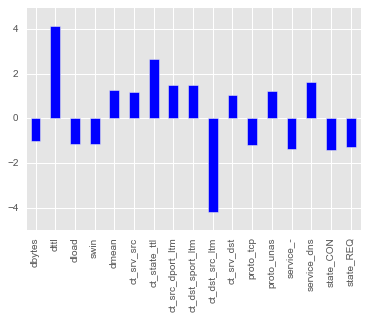

In [144]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

threshold = 1 # threshold value manually manipulated
weights = pd.Series(lr_clf.coef_[0],index=df3.columns)
# temporarily stuff series in temporary dataframe to select based on value then pull
# it out to plot in bar graph.
temp_df = pd.DataFrame(weights)
temp_df = temp_df[(temp_df[0] > threshold) | (temp_df[0] < (-1 * threshold))]
weights = temp_df[0]

weights.plot(kind='bar')
plt.show()  # totally unreadable due to too many features on an individual level
#  Maybe replot with the highest and lowest 25%

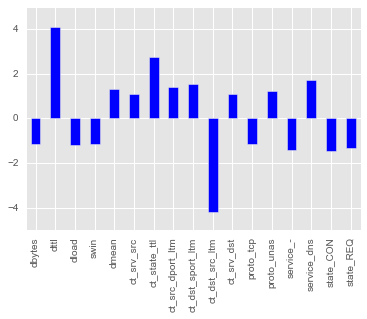

In [146]:
# you can also apply the StandardScaler function insied of the validation loop 
#  but this requires the use of PipeLines in scikit. Here is an example, but we will go over more 
#  thorough examples later in class

from sklearn.pipeline import Pipeline

std_scl = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=0.05) 

# create the pipline
piped_object = Pipeline([('scale', std_scl), ('logit_model', lr_clf)])

# run the pipline corssvalidated
for iter_num, (train_indices, test_indices) in enumerate(cv_object):
    piped_object.fit(X[train_indices],y[train_indices])  # train object
    
# it is a little odd getting trained objects from a  pipeline:
trained_model_from_pipeline = piped_object.named_steps['logit_model']

# now look at the weights
weights = pd.Series(trained_model_from_pipeline.coef_[0],index=df3.columns)
temp_df = pd.DataFrame(weights)
temp_df = temp_df[(temp_df[0] > threshold) | (temp_df[0] < (-1 * threshold))]
weights = temp_df[0]
weights.plot(kind='bar')
plt.show()

   # Support Vector Machines

In [19]:
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object: 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

In [20]:
type(X_train_scaled) 
type(y_train)
type(X_train_scaled[0][0])
y_train2 = y_train.astype(float)
y_train2
X_train_scaled2 = X_train_scaled.astype(float)
X_train_scaled2
type(X_train_scaled[0][0])

numpy.float64

In [21]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC
# ref: http://scikit-learn.org/stable/modules/svm.html

# train the model just as before
svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object
#svm_clf.fit(X_train_scaled2, y_train2)  # train object
y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

('accuracy:', 0.93380298797522165)
[[6884  568]
 [ 522 8492]]


In [150]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(14687L, 190L)
(14687L,)
[6948 7739]


[[ -1.88356331e-02   1.71829001e+00   2.63341531e+00  -4.00360959e+00
   -4.18352363e+00  -3.00232389e-01   4.24806186e-01   6.22249453e+00
    3.30733711e-02  -2.01513229e+00   2.20859591e+00   1.33374650e+00
   -2.73715507e-01  -1.08129132e-01  -1.44437368e-01   3.81496870e-01
   -9.38473404e-01  -1.36564054e-03  -3.58674062e-03  -1.03632223e+00
   -4.33266783e-01  -6.68532197e-01  -5.32489674e-02  -2.87428084e-02
    1.19682868e+00  -1.80824324e-02   2.31163039e-02   1.02693444e+00
    6.80072207e+00  -3.95335869e-01   3.03930630e+00   1.25091653e+00
   -7.90661503e+00   1.26781252e-02   1.25276696e-02  -3.00270099e-01
   -3.83209370e-01   1.84865498e+00  -1.18349774e-13   6.93202887e-02
    9.22456837e-02   8.48297906e-02   1.55051745e-01   3.45067260e-02
    6.96041015e-02  -4.94604357e-14   8.29796080e-02   4.62197545e-02
    9.16032629e-02   6.52093940e-02   3.00133070e-02   8.00941906e-02
    4.19836067e-02   7.03134273e-02   1.13647591e-01   8.67602266e-02
    6.30342447e-02  

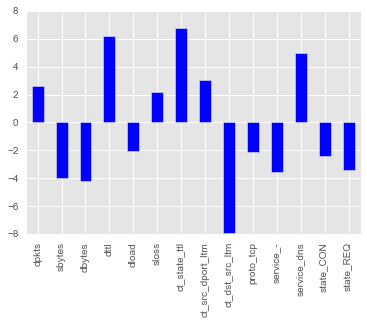

In [154]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
print(svm_clf.coef_)
weights = pd.Series(svm_clf.coef_[0],index=df3.columns)
temp_df = pd.DataFrame(weights)
threshold = 2  # Changed threshold as 1 didn't filter enough, too hard to read
temp_df = temp_df[(temp_df[0] > threshold) | (temp_df[0] < (-1 * threshold))]
weights = temp_df[0]
weights.plot(kind='bar')

In [156]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = df3.iloc[train_indices] # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = df_tested_on.iloc[svm_clf.support_,:]

df_support['label'] = y[svm_clf.support_] # add back in the 'Survived' Column to the pandas dataframe
df3['label'] = y # also add it back in for the original data
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14687 entries, 73708 to 47186
Columns: 191 entries, dur to label
dtypes: float64(162), int64(29)
memory usage: 21.5 MB


C:\Anaconda\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


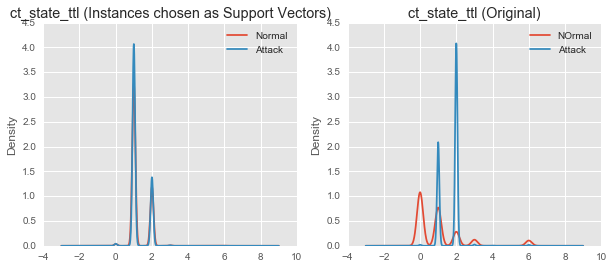

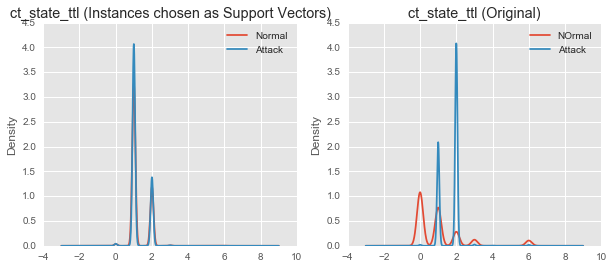

In [160]:
# now lets see the statistics of these attributes
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['label'])
df_grouped = df3.groupby(['label'])

# plot KDE of Different variables
#vars_to_plot = ['Age','Pclass','IsMale','FamilySize']
vars_to_plot = ['ct_state_ttl', 'ct_state_ttl']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Normal','Attack'])  # how do we not the correct order?
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['NOrmal','Attack'])
    plt.title(v+' (Original)')


Tweaking Logistic Regression parameters on kitchen sink features and seeing effects on accuracy
Penalty values range from this set: ('l1', 'l2') # default is l2 and run time efficiency.
Note the logistic regression appears to take a while.



In [11]:
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.cross_validation import cross_val_score
# ref": http://stackoverflow.com/questions/15707056/get-time-of-execution-of-a-block-of-code-in-python-2-7
import timeit

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
penaltyVals = ('l2', 'l1')
for penVal in penaltyVals:
    start_time = timeit.default_timer()
    lr_clf = LogisticRegression(penalty=penVal, C=1.0, class_weight=None) # get object
    accuracies = cross_val_score(lr_clf, X, y=y, cv=cv_object) # this also can help with parallelism
    elapsed = timeit.default_timer() - start_time
    #print(accuracies)
    print "Penalty value (" + penVal + ") Average Accuracy across " + str(num_cv_iterations) + " shuffle split cross validation iterations = " + str(np.average(accuracies)) + " elasped time in seconds " + str(elapsed)
    

Penalty value (l2) Average Accuracy across 3 shuffle split cross validation iterations = 0.752297663873 elasped time in seconds 5.01155646727
Penalty value (l1) Average Accuracy across 3 shuffle split cross validation iterations = 0.921555528564 elasped time in seconds 865.148999092


Run 1 (order:, l1, l2)
Penalty value (l1) Average Accuracy across 3 shuffle split cross validation iterations = 0.923316733471 elasped time in seconds 882.909233884
Penalty value (l2) Average Accuracy across 3 shuffle split cross validation iterations = 0.754949593101 elasped time in seconds 4.85387517498

Run 2( order: l2, l1)
Penalty value (l2) Average Accuracy across 3 shuffle split cross validation iterations = 0.752297663873 elasped time in seconds 5.01155646727
Penalty value (l1) Average Accuracy across 3 shuffle split cross validation iterations = 0.921555528564 elasped time in seconds 865.148999092

Note: not really sure if the research below really helps to explain our results. 

Reference for background on l1 and l2 for predition:
https://www.quora.com/What-is-the-difference-between-L1-and-L2-regularization
Typically ridge or ℓ2 penalties are much better for minimizing prediction error rather than ℓ1 penalties. The reason for this is that when two predictors are highly correlated, ℓ1 regularizer will simply pick one of the two predictors. In contrast, the ℓ2 regularizer will keep both of them and jointly shrink the corresponding coefficients a little bit. Thus, while the ℓ1 penalty can certainly reduce overfitting, you may also experience a loss in predictive power. 

ref: https://www.youtube.com/watch?v=sO4ZirJh9ds
Says L1 encourages some level of sparsity which makes model more efficient to store, compute and reveal which features are most important to the prediction. 

ref: https://www.youtube.com/watch?v=nmHNXsDPPFQ
Really good video on under, "just right" and overfitting (logistic regression)

Ref: http://scikit-learn.org/stable/modules/sgd.html
According to the reference above, Stochastic Gradient Descent is applicable to applicable to large scale and sparse machine learning problems where observations with more than 10^5 training examples and more than 10^5 features. In our case, we are not dealing with 82332 observations x 45  features from the raw original dataset.  In computing the model for logistic regression in the worst case runtime emperically run, it has taken about 866 seconds or 14 minutes.

Tweaking Support Vector Machine parameters on kitchen sink features and seeing effects on accuracy
Kernel values range from this set: ('linear', 'poly', 'rbf', 'sigmoid') # default is 'rbf'. 


In [14]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)


In [15]:
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object: 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) 

In [18]:
y_train

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [23]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC
# ref: http://scikit-learn.org/stable/modules/svm.html

# train the model just as before

kernelVals = ('linear', 'poly', 'rbf', 'sigmoid') 
degreeVals = (1, 2, 3, 4)  # Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
for kernelVal in kernelVals:
    for degreeVal in degreeVals:
        start_time = timeit.default_timer()
        svm_clf = SVC(C=0.5, kernel=kernelVal, degree=degreeVal, gamma='auto') # get object
        svm_clf.fit(X_train_scaled, y_train)  # train object
        #svm_clf.fit(X_train_scaled2, y_train2)  # train object
        y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

        acc = mt.accuracy_score(y_test,y_hat)
        conf = mt.confusion_matrix(y_test,y_hat)
        elapsed = timeit.default_timer() - start_time
        
        print('accuracy:', acc )
        print "kernel Vals (" + kernelVal + ") Degree Val (" + str(degreeVal) + ") Average Accuracy across " + str(num_cv_iterations) + " shuffle split cross validation iterations = " + str(acc) + " elasped time in seconds " + str(elapsed)

('accuracy:', 0.93380298797522165)
kernel Vals (linear) Degree Val (1) Average Accuracy across 3 shuffle split cross validation iterations = 0.933802987975 elasped time in seconds 565.340272169
('accuracy:', 0.93380298797522165)
kernel Vals (linear) Degree Val (2) Average Accuracy across 3 shuffle split cross validation iterations = 0.933802987975 elasped time in seconds 563.470504869
('accuracy:', 0.93380298797522165)
kernel Vals (linear) Degree Val (3) Average Accuracy across 3 shuffle split cross validation iterations = 0.933802987975 elasped time in seconds 560.159730786
('accuracy:', 0.93380298797522165)
kernel Vals (linear) Degree Val (4) Average Accuracy across 3 shuffle split cross validation iterations = 0.933802987975 elasped time in seconds 563.94064991
('accuracy:', 0.89560306085266606)
kernel Vals (poly) Degree Val (1) Average Accuracy across 3 shuffle split cross validation iterations = 0.895603060853 elasped time in seconds 520.913972599
('accuracy:', 0.87720150613385162

Ref: http://scikit-learn.org/stable/modules/sgd.html According to the reference above, Stochastic Gradient Descent is applicable to applicable to large scale and sparse machine learning problems where observations with more than 10^5 training examples and more than 10^5 features. In our case, we are not dealing with 82332 observations x 45 features from the raw original dataset. In computing the model for SVM in the worst case runtime emperically run, it has taken about 1162 seconds or 20 minutes.  So although not instaneous, still reasonable hence why we iterated between the varous kernels and not just use the linear kernel.  overall, the the best accuracy seems to be with the linear kernel with 93% (Note: the degree parameter only plays a part for the 'poly' kernels that were tried as seen above.
